In [3]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
print(data.shape)
m, n = data.shape
# m is the number of training examples, n is the number of features + 1 (Y column)
np.random.shuffle(data)

data_dev = data[0:1000].T #Take the first 1000 rows, and transpose the matrix to get 1000 examples as column vectors
data_dev

(42000, 785)


array([[0, 3, 1, ..., 5, 2, 4],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
Y_dev = data_dev[0] #Takes the first row, which contains all of the answers to the numbers (the Y is what we want)

In [7]:
X_dev = data_dev[1:n] #Takes all of the data corresponding to all of the entries (the X values)
X_dev = X_dev / 255.

In [8]:
data_train = data[1000:m].T
data_train

array([[6, 8, 7, ..., 6, 3, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
Y_train = data_train[0] #Takes the first row, which contains all of the answers to the numbers
Y_train

array([6, 8, 7, ..., 6, 3, 3])

In [10]:
X_train= data_train[1:n] #Takes all of the data corresponding to all of the entries
X_train
X_train = X_train / 255.
_,m_train = X_train.shape

In [11]:
# Functionalities
def params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def der_ReLU(Z):
  return Z > 0


def create(Y):
  column_Y = np.zeros((Y.size, Y.max() + 1))
  column_Y[np.arange(Y.size), Y] = 1
  column_Y = column_Y.T
  return column_Y


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  create_Y = create(Y)
  dZ2 = A2 - create_Y
  dW2 =  1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * der_ReLU(Z1)
  dW1=  1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


def get_predictions(A2):
  return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
  return (np.sum(predictions == Y) / Y.size ) * 100


In [17]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = params()
    print(f"{'Iteration':^12} | {'Accuracy':^12}")
    print("-" * 27)  # To separate the headers from the values
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            accuracy = get_accuracy(get_predictions(A2), Y)
            print(f"{i:^12} | {accuracy:^12.2f}")
    
    return W1, b1, W2, b2

In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, 0.1)

 Iteration   |   Accuracy  
---------------------------
     0       |    10.76    
     10      |    20.60    
     20      |    27.12    
     30      |    31.62    
     40      |    34.69    
     50      |    37.44    
     60      |    40.09    
     70      |    42.82    
     80      |    45.55    
     90      |    48.05    


Prediction:  [6]
Label:  6


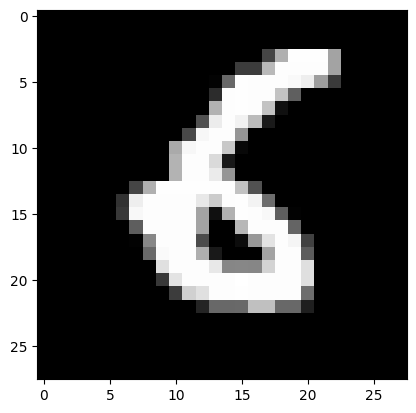

Prediction:  [8]
Label:  8


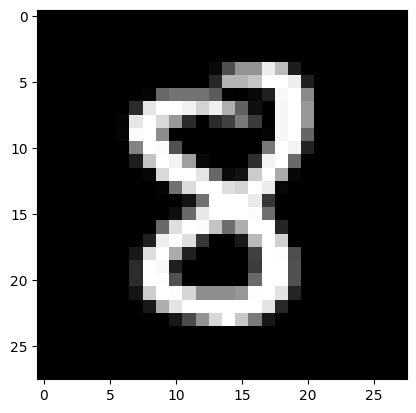

Prediction:  [9]
Label:  7


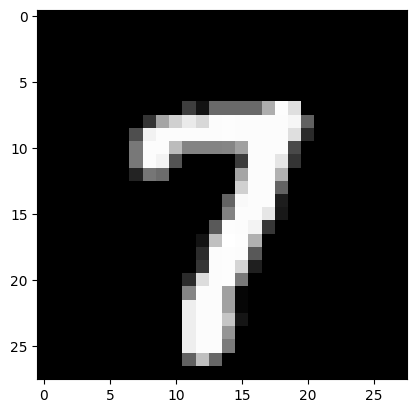

Prediction:  [6]
Label:  2


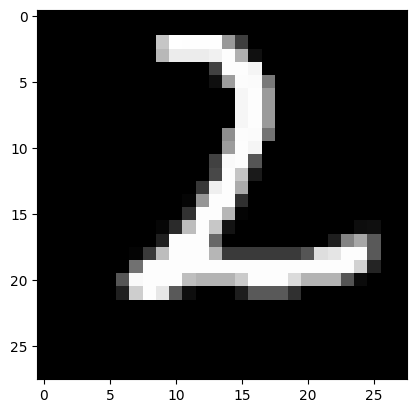

Acccuracy:  52.7 %


In [26]:
def make_predictions(X, W1, b1, W2, b2):
    #Do one set of forward propogation, then try to predict the data properly
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Acccuracy: ", get_accuracy(dev_predictions, Y_dev), "%")